# Data Preperation

## Setup

In [8]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Spark libs
from pyspark.sql.session import SparkSession

# helper functions
from helpers.helper_functions import translate_to_file_string

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

inputFile = translate_to_file_string("./data/Data_Preparation_Result.csv")

## Create Spark Session

In [6]:
#create a SparkSession
spark = (SparkSession
       .builder
       .appName("RKIDATAUNDERSTANDING")
       .getOrCreate())
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile)   
print(df.printSchema())

root
 |-- Bundesland: string (nullable = true)
 |-- BundeslandIndex: integer (nullable = true)
 |-- Landkreis: string (nullable = true)
 |-- LandkreisIndex: integer (nullable = true)
 |-- Altersgruppe: string (nullable = true)
 |-- AltersgruppeIndex: double (nullable = true)
 |-- Geschlecht: string (nullable = true)
 |-- GeschlechtIndex: double (nullable = true)
 |-- FallStatus: string (nullable = true)
 |-- FallStatusIndex: double (nullable = true)

None


In [7]:
df.count()

3675296

### Dataplot

In [12]:
printDf(df.summary())

,summary,Bundesland,BundeslandIndex,Landkreis,LandkreisIndex,Altersgruppe,AltersgruppeIndex,Geschlecht,GeschlechtIndex,FallStatus,FallStatusIndex
0,count,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296
1,mean,None,7.96834676717195,None,8299.551207848293,None,1.2410355519664267,None,0.4848072100859359,None,0.0793993191296701
2,stddev,None,3.674480465407683,None,3652.432864601237,None,1.3592062662803304,None,0.49976919382208435,None,0.3480989234232694
3,min,Baden-Württemberg,1,LK Ahrweiler,1001,A00-A04,0.0,M,0.0,GENESEN,0.0
4,25%,None,5,None,5562,None,0.0,None,0.0,None,0.0
5,50%,None,8,None,8128,None,1.0,None,0.0,None,0.0
6,75%,None,9,None,9774,None,2.0,None,1.0,None,0.0
7,max,Thüringen,16,Städteregion Aachen,16077,A80+,5.0,W,1.0,NICHTEINGETRETEN,2.0


### Histogramm

Saving figure attribute_histogram_plots


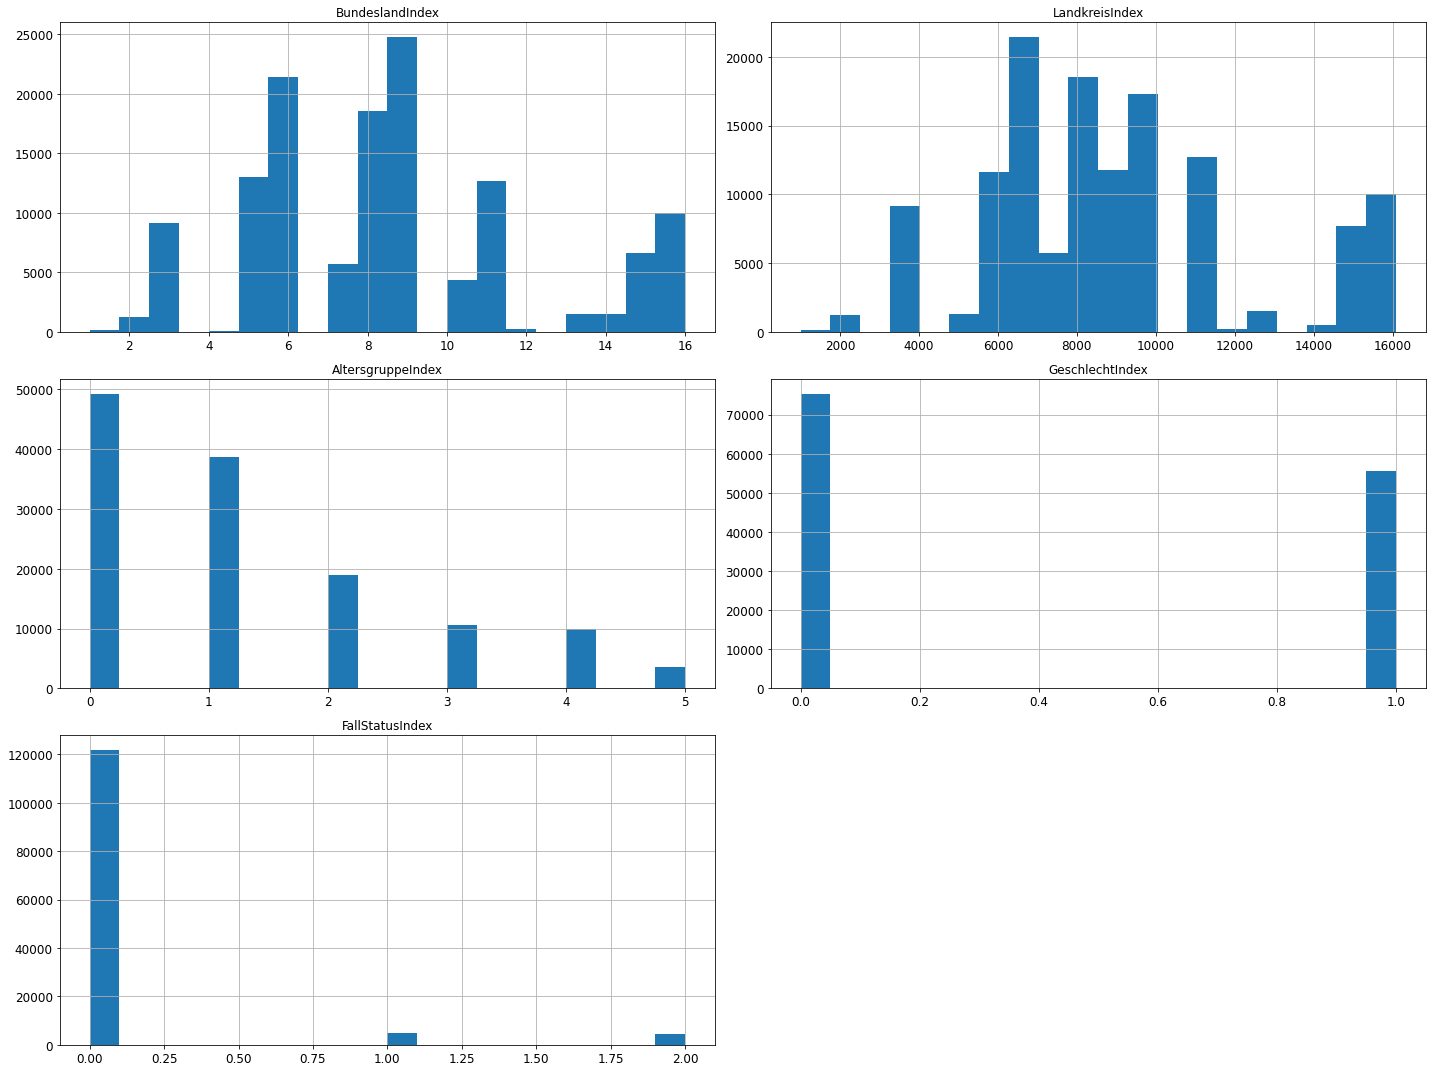

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.toPandas().hist(bins=20, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
## Lagemaße
Nachfolgend werden verschiedene Lage-Maße des Datensatzes ermittelt